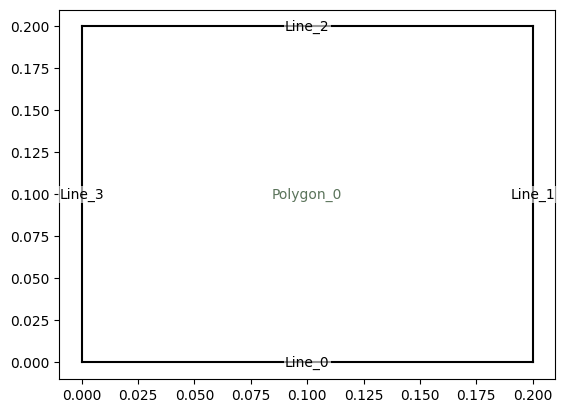

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import fluid_fvm.solver as sol
import numpy as np
import fluid_fvm.mp_coupling as mp

a_rect = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[])
a_rect.assemble()
fig,ax = plt.subplots()
a_rect.plot(ax, labels = True)

# Heat conduction 

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[[0.]]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self0
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[[0.]]
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 20
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[[0.]]
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:2  Neighbour: 2 Nwighbour idx: 21
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node

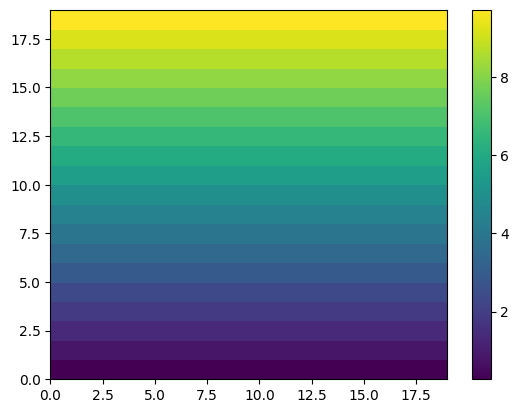

In [2]:

mat = pr.Material("example", gamma = 1, color = "#ffbbcc")
comp = pr.Component()

comp.setAssembly(a_rect)
comp.assignMaterial("Polygon_0", mat)

mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)

bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 10),
          "Line_3" : ph.Boundary("Neumann", 0),}

ht_rect = ph.HeatTransfer(a_rect,bcdict)
comp.setPhysics(ht_rect)

d_rect = dc.LinearFullDiscretizer(comp, 1)
d_rect.discretize()

sl = sol.FullBlockSolver(d_rect.Amrx,d_rect.Bmrx)
sl.solve()
res_math = sl.res
res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]

fig, ax = plt.subplots()
pl = plt.pcolor(res)
fig.colorbar(pl,)


# Couette

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[[0.01052632]]
Neighbour:[[-0.01052632]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self0
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 20
Self[[0.01052632]]
Neighbour:[[-0.01052632]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 2 Nwighbour idx: 21
Self[[0.01052632]]
Neighbour:[[

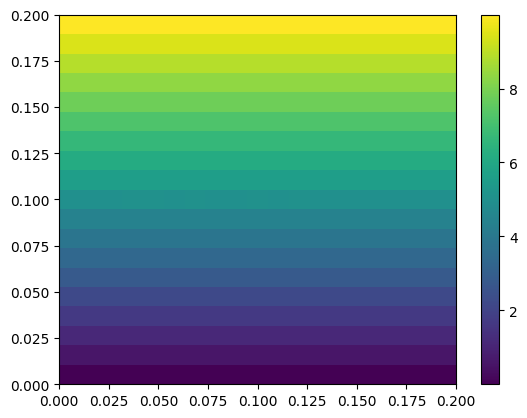

In [62]:
mat = pr.Material("example", mu = 1, color = "#ffbbcc")
comp = pr.Component()

comp.setAssembly(a_rect)
comp.assignMaterial("Polygon_0", mat)

mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)

bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 10),
          "Line_3" : ph.Boundary("Neumann", 0),}

flowDirection = geo.Vector(x=1,y = 0)
couette = ph.CouetteFlow(a_rect, bcdict, flowDirectionUnitVector=flowDirection)

comp.setPhysics(couette)

d_rect = dc.LinearFullDiscretizer(comp, 1)
d_rect.discretize()

sl = sol.FullBlockSolver(d_rect.Amrx,d_rect.Bmrx)
sl.solve()
res_math = sl.res
res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]

mesh_y = np.zeros(mesh_c.volumeMesh.shape)

mesh_x = np.zeros(mesh_c.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c.volumeMesh.shape):
    thispoint = mesh_c.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y

fig, ax = plt.subplots()
pl = plt.pcolormesh(mesh_x, mesh_y,res)
fig.colorbar(pl,)


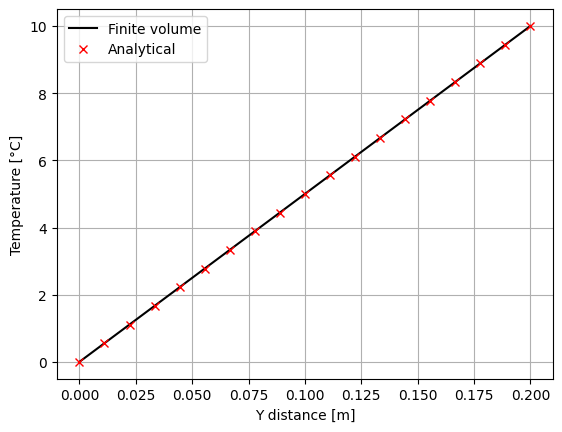

In [47]:
channel_height = 0.2

y = np.linspace(0, channel_height, 19)


dpdx = 10/0.2
mu = 1
theta = y*10/channel_height

fig, ax = plt.subplots()

ax.plot(y, res[:,10], "k-")
ax.plot(y, theta, "rx")
ax.grid(True)
ax.set_xlabel("Y distance [m]")
ax.set_ylabel("Velocity [m/s]")
ax.legend(["Finite volume", "Analytical"], )

# Poissule

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self0
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 20
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 2 Nwighbour idx: 21
Self[[1.]]
Neighbour:[[-1.]]
Const:0
---------------
Node:2  Ne

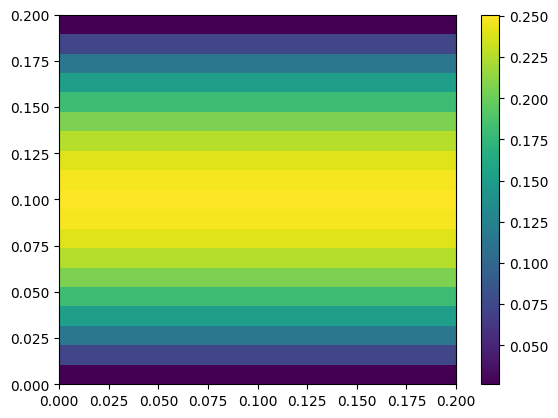

In [61]:
mat = pr.Material("example", mu = 1, color = "#ffbbcc")
comp = pr.Component()

comp.setAssembly(a_rect)
comp.assignMaterial("Polygon_0", mat)

mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)

bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 0),
          "Line_3" : ph.Boundary("Neumann", 0),}

flowDirection = geo.Vector(x=1,y = 0)
poissoule = ph.PoissonFlowFixP(a_rect, bcdict, flowDirectionUnitVector=flowDirection, dpdx=10/0.2)
comp.setPhysics(poissoule)

d_rect = dc.LinearFullDiscretizer(comp, 1)
d_rect.discretize()

sl = sol.FullBlockSolver(d_rect.Amrx,d_rect.Bmrx)
sl.solve()
res_math = sl.res
res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]


mesh_y = np.zeros(mesh_c.volumeMesh.shape)

mesh_x = np.zeros(mesh_c.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c.volumeMesh.shape):
    thispoint = mesh_c.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y

fig, ax = plt.subplots()
pl = plt.pcolormesh(mesh_x, mesh_y,res)
fig.colorbar(pl,)


array([[0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579],
       [0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 ,
        0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 ,
        0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 ,
        0.0734072 , 0.0734072 , 0.0734072 , 0.0734072 ],
       [0.11495845, 0.11495845, 0.11495845, 0.11495845, 0.11495845,
        0.11495845, 0.11495845, 0.11495845, 0.11495845, 0.11495845,
        0.11495845, 0.11495845, 0.11495845, 0.11495845, 0.11495845,
        0.11495845, 0.11495845, 0.11495845, 0.11495845],
       [0.15096953, 0.15096953, 0.15096953, 0.15096953, 0.15096953,
        0.15096953, 0.15096953, 0.15096953, 0.15096953, 0.15096953,
        0.15096953, 0.15096953, 0.15096953, 0.15096953, 0.15096953,
        0.150

Analytical

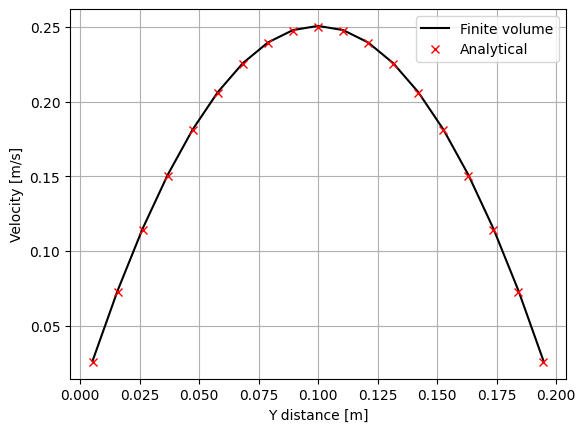

In [37]:
channel_height = 0.2

y = np.linspace(channel_height/38, channel_height-channel_height/38, 19)


dpdx = 10/0.2
mu = 1
theta = dpdx* mu* y/2*(channel_height-y)

fig, ax = plt.subplots()

ax.plot(y, res[:,10], "k-")
ax.plot(y, theta, "rx")
ax.grid(True)
ax.set_xlabel("Y distance [m]")
ax.set_ylabel("Velocity [m/s]")
ax.legend(["Finite volume", "Analytical"], )

# Stokes

Node:0  Neighbour: 0 Nwighbour idx: []
Self[2. 0. 0.]
Neighbour:[0 0 0]
Const:-0.0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[1.         0.         0.00526316]
Neighbour:[-1.          0.          0.00526316]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[1. 0. 0.]
Neighbour:[-1.  0.  0.]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[ 2.          0.         -0.01052632]
Neighbour:[0 0 0]
Const:10.0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[ 0.          2.         -0.01052632]
Neighbour:[0 0 0]
Const:[-0.]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[0. 1. 0.]
Neighbour:[ 0. -1.  0.]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[0.         1.         0.00526316]
Neighbour:[ 0.         -1.          0.00526316]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[0. 2. 0.]
Neighbour:[0 0 0]
Const:[-0.]
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[0 

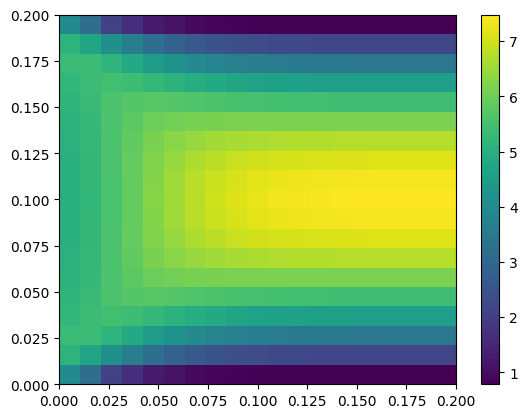

In [60]:
mat = pr.Material("example", mu = 1, color = "#ffbbcc")
comp = pr.Component()

comp.setAssembly(a_rect)
comp.assignMaterial("Polygon_0", mat)

mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)


bcdict = {"Line_0" : ph.Boundary("No_slip", 0),
          "Line_1" : ph.Boundary("Pressure_outlet", 2),
          "Line_2" : ph.Boundary("No_slip", 0),
          "Line_3" : ph.Boundary("Velocity_inlet", 5),}

stokes = ph.StokesFlow(a_rect, bcdict)

comp.setPhysics(stokes)



d_rect = dc.LinearFullDiscretizer(comp, 3)
d_rect.discretize()

sl = sol.FullBlockSolver(d_rect.Amrx,d_rect.Bmrx)
sl.solve()
res_math = sl.res

res_u = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res_u[mesh_c.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res_v[mesh_c.math2geoVolume(i)] = res_math[i*3+1]


res_p = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res_p[mesh_c.math2geoVolume(i)] = res_math[i*3+2]

mesh_y = np.zeros(mesh_c.volumeMesh.shape)

mesh_x = np.zeros(mesh_c.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c.volumeMesh.shape):
    thispoint = mesh_c.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y

fig, ax = plt.subplots()
pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)


In [59]:
(0.2**2/8)*300/0.2

7.500000000000001

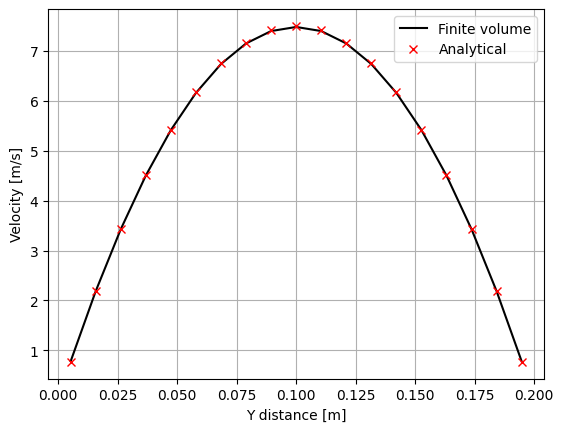

In [57]:
channel_height = 0.2

y = np.linspace(channel_height/38, channel_height-channel_height/38, 19)


dpdx = 300/0.2
mu = 1
theta = dpdx* mu* y/2*(channel_height-y)

fig, ax = plt.subplots()

ax.plot(y, res_u[:,-1], "k-")
ax.plot(y, theta, "rx")
ax.grid(True)
ax.set_xlabel("Y distance [m]")
ax.set_ylabel("Velocity [m/s]")
ax.legend(["Finite volume", "Analytical"], )

# Heat transfer

#### Flow

33.0
18.0
14.0
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 0. 1.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 0. 1.]]
Neigh

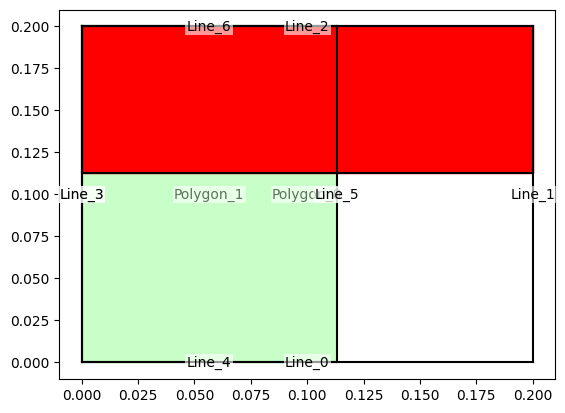

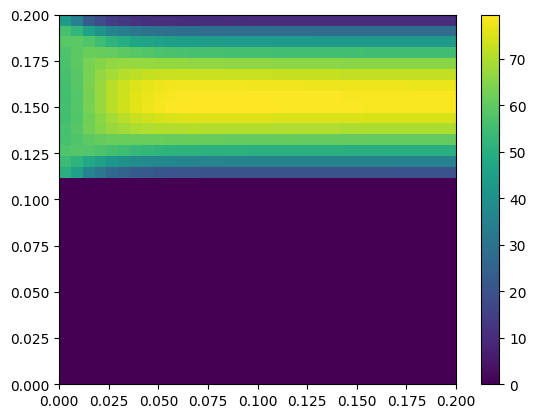

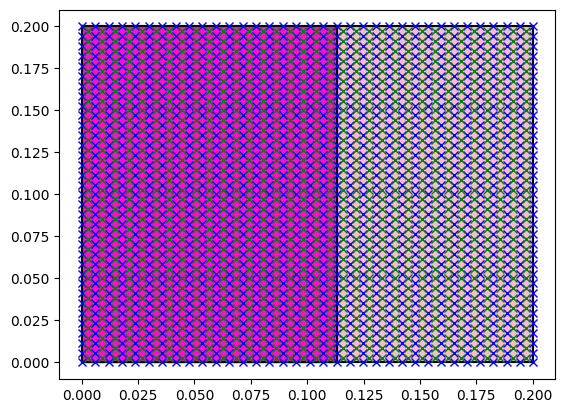

In [120]:
a_HT = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.2), geo.Vector(0,0.2)])])
a_HT.assemble()

fig, ax = plt.subplots()
a_HT.plot(ax=ax, labels=True)
mesh_c_full = ms.RectangularSnappingConfig(35,35)
mat = pr.Material("test", mu = 1, rho = 156, gamma = 1,color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, gamma = 1, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a_HT)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)
comp.setMesh(mesh_c_full)

valid_polygon = geo.Polygon([geo.Vector(0.113,0), geo.Vector(0.2,0), geo.Vector(0.2,0.2), geo.Vector(0,0.2), geo.Vector(0,0.139),geo.Vector(0.113,0.139)])
valid_polygon = geo.Polygon([geo.Vector(0,0.113),geo.Vector(0,0.2),geo.Vector(0.2,0.2),geo.Vector(0.2,0.113), ])
valid_polygon.plot(ax, color="red")

bcdictStokes = {"Line_0" : ph.Boundary("No_slip", 0),
          "Line_1" : ph.Boundary("Pressure_outlet", 0),
          "Line_2" : ph.Boundary("No_slip", 0),
          "Line_3" : ph.Boundary("Velocity_inlet", 55),
          "Line_5" : ph.Boundary("No_slip", 0),
          "Line_6" : ph.Boundary("No_slip", 0),}


c = ph.StokesFlow(a_HT, bcdictStokes)
phys = mp.PartialSolution(c, valid_polygon, 3)
comp.setPhysics(phys)
disc = dc.LinearFullDiscretizerMultiphysics(comp,3)
disc.discretize()
#plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)




res = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res[mesh_c_full.math2geoVolume(i)] = res_math[i]

mesh_y = np.zeros(mesh_c_full.volumeMesh.shape)

mesh_x = np.zeros(mesh_c_full.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c_full.volumeMesh.shape):
    thispoint = mesh_c_full.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y


res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]

fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)

fig, ax = plt.subplots()
comp.plot(ax,mesh=True)

#### Temperature

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[[0.]]]
Neighbour:0
Const:0.0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[[0.98906819]]]
Neighbour:[[[-0.98906819]]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[[1.01105263]]]
Neighbour:[[[-1.01105263]]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1.97813639]]
Neighbour:0
Const:[[[19.78136387]]]
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[[0.]]]
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[[0.98906819]]]
Neighbour:[[[-0.98906819]]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 35
Self[[[1.01105263]]]
Neighbour:[[[-1.01105263]]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[[0.98906819]]]
Neighbour:[[[-0.98906819]]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[[0.]]]
Neighbour:0
Const:0.0
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[[0.98906819]]]
Neig

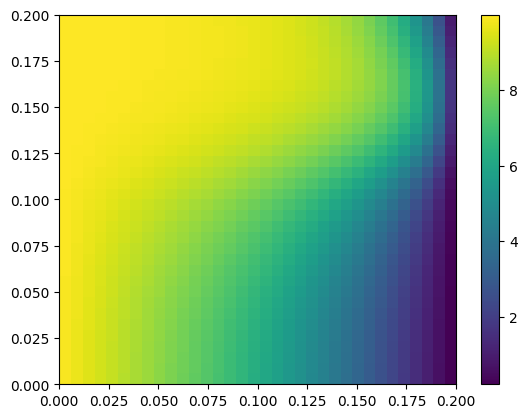

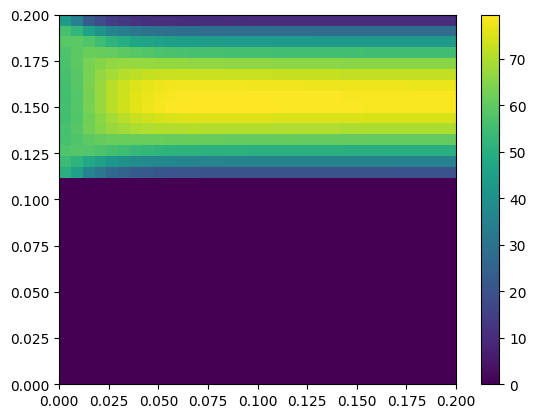

In [116]:
res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]

res_vectors = np.zeros((mesh_c_full.vyNum*mesh_c_full.vxNum), dtype=geo.Vector)
for idx,v in enumerate(res_vectors):
        res_vectors[idx] = geo.Vector(res_math[idx*3], res_math[idx*3+1])

bcdictHT = {"Line_0" : ph.Boundary("Dirichlet", 10),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_3" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 0),}
bcdictHT = {"Line_1" : ph.Boundary("Dirichlet", 0),
          "Line_0" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Neumann", 0),
          "Line_3" : ph.Boundary("Dirichlet", 10),}
comp.setPhysics(ph.HeatTransferFull(a_HT,bcdictHT))
disc2 = dc.LinearFullParametricDiscretizetion(comp,1)
disc2.discretize(param=res_vectors)

res_math_T = np.linalg.solve(disc2.Amrx, disc2.Bmrx)


res_t = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_t[mesh_c_full.math2geoVolume(i)] = res_math_T[i]
pl = plt.pcolormesh(mesh_x, mesh_y,res_t)
fig.colorbar(pl,)
fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)



In [117]:
import pandas as pand

r = pand.read_csv("comsol_data.txt")

r

x     y   T (degC)  spf.U (m/s)
0  -0.550000 -0.35  10.002441    54.986572
1  -0.533085 -0.35   9.986200    63.269326
2  -0.516232 -0.35   9.955065    73.894557
3  -0.499564 -0.35   9.906626    78.835917
4  -0.483043 -0.35   9.837972    80.452291
5  -0.466521 -0.35   9.743474    80.913823
6  -0.450000 -0.35   9.617263    81.063886
7  -0.433479 -0.35   9.445086    81.168855
8  -0.416957 -0.35   9.196298    81.354408
9  -0.400436 -0.35   8.806134    81.812106
10 -0.383768 -0.35   8.082892    82.749154
11 -0.366915 -0.35   6.303106    83.567074
12 -0.350000 -0.35   0.004883    80.549271

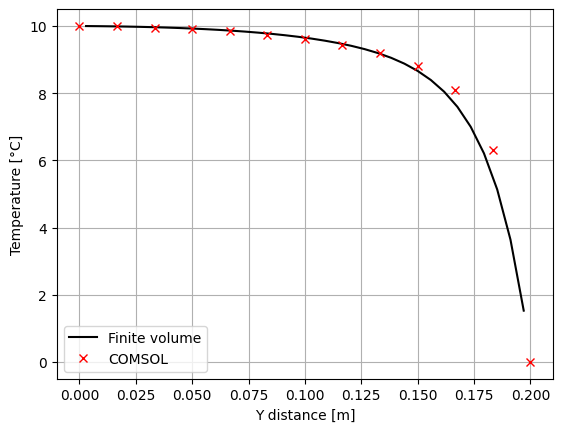

In [127]:

channel_height = 0.2

y = np.linspace(channel_height/(34*2), channel_height-channel_height/(34*2), 34)

y2 = np.linspace(0, channel_height, 13)



fig, ax = plt.subplots()

ax.plot(y, res_t[-5,:], "k-")
ax.plot(y2, r.loc[:,"T (degC)"], "rx")
ax.grid(True)
ax.set_xlabel("Y distance [m]")
ax.set_ylabel("Temperature [°C]")
ax.legend(["Finite volume", "COMSOL"], )

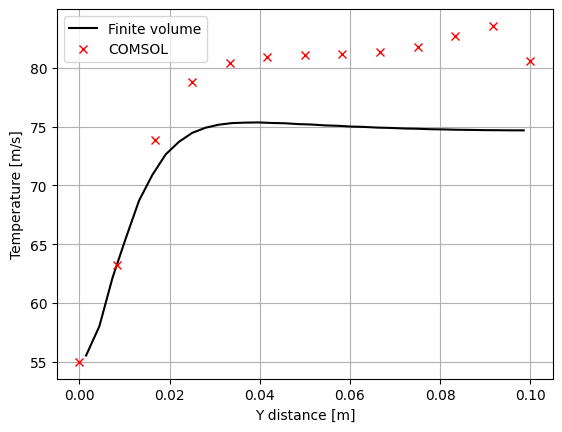

In [124]:
channel_height = 0.1

y = np.linspace(channel_height/(34*2), channel_height-channel_height/(34*2), 34)

y2 = np.linspace(0, channel_height, 13)



fig, ax = plt.subplots()

ax.plot(y, res_u[-10,:], "k-")
ax.plot(y2, r.loc[:,"spf.U (m/s)"], "rx")
ax.grid(True)
ax.set_xlabel("Y distance [m]")
ax.set_ylabel("Temperature [m/s]")
ax.legend(["Finite volume", "COMSOL"], )